# HW 1: Network Flow Optimization
## Gerald Jones
## Fall 2023
## Purpose: Implement the Forward and Reverse star graph algorithms

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#############################################################################################################
############################################ Method Definitions  ############################################
#############################################################################################################

#############################################################################################################
########################################### edge generator
def generateEdges(N, E):
    # get a randomized list of edges
    RNGedges = np.random.choice(range(N), N, replace=False)
    edges = []
    
    # while we have not created enough edges
    while(len(edges) < E):
        # pick a random node (tail)
        tn = int(np.random.choice(range(N), 1, replace=False))
        
        # pick a random node for the head and make sure we don't make loops
        hn = int(tn)
        # make sure the head node is not the tail node (loop)
        while hn == tn:
            tn = int(np.random.choice(range(N), 1, replace=False))
        # now add this edge to the edge list
        if (tn, hn) not in edges:
            edges.append((tn, hn))
    return edges


#############################################################################################################
############################### Graph making tools
def generateGraph(Graph: nx.Graph, nodes: list, edges: list):
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)
    
def showGraph(G, axisPosition, options):
    subax = plt.subplot(axisPosition)
#     nx.draw(G, with_labels=True, font_weight="bold")
    nx.draw(G, **options)
    
#############################################################################################################    
############################### Graph alogorithms
def forwardStarG(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = np.full(N, np.nan)
    count = []
    c = 0
    # create sorted list of edges by the tails
    edges_sorted = sorted(edges, key=lambda x: x[0])
    node = np.inf    # initial node with place holder value
    
    # for every edge in the list 
    # go through and look for the tail node to change
    # when found store the current incrment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[0] != node:
            node = edge[0]
            pointers[node] = int(index)
    return edges_sorted, list(pointers), count


def reverseStarG(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = np.full(N, np.nan)

    # create sorted list of edges by the heads
    edges_sorted = sorted(edges, key=lambda x: x[1])
    index = 0   
    node = np.inf    # initial node
    
    # for every edge in the list 
    # go through and look for the head node to change
    # when found store the current increment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):

        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[1] != node:
            node = edge[1]
            pointers[node] = index
    return edges_sorted, pointers, count




# Create test Graph

edge-0: (8, 9)
edge-1: (8, 3)
edge-2: (0, 3)
edge-3: (9, 2)
edge-4: (4, 3)
edge-5: (4, 7)
edge-6: (9, 7)
edge-7: (7, 0)
edge-8: (9, 8)
edge-9: (0, 7)
edge-10: (2, 0)
edge-11: (1, 9)
edge-12: (8, 0)
edge-13: (7, 1)
edge-14: (7, 3)
edge-15: (7, 6)
edge-16: (0, 2)
edge-17: (5, 1)
edge-18: (5, 8)
edge-19: (3, 7)


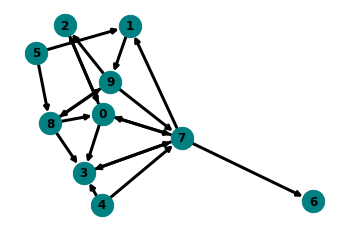

In [13]:
N = 10      # number of nodes named lexographically
E = 20      # number of edges to create

# # # # create the edges
edges = generateEdges(N, E)

# # # # create the nodes as a list
nodes = list(range(N))

# # # # Check out the edges to see if they make some sense
for i,e in enumerate(edges):
    print(f"edge-{i}: {e}")
    

# create a di-graph so we can visualize it with networkx and pyplot
toyG = nx.DiGraph()
generateGraph(toyG, nodes, edges)

# set up some visualization options for the plot
options = {
    'node_color': 'teal',
    'node_size': 500,
    'width': 3,
    'with_labels':True, 
    'font_weight':"bold"
}

showGraph(toyG, 111, options)

# Forward and Reverse Start Testing

In [14]:
edges_sorted, pointers, count = forwardStarG(N, edges)
print("forward star:")
print("|   0  |   1   |   2   |   3   |")
print(edges_sorted)
print(pointers)
print(count)

forward star:
|   0  |   1   |   2   |   3   |
[(0, 3), (0, 7), (0, 2), (1, 9), (2, 0), (3, 7), (4, 3), (4, 7), (5, 1), (5, 8), (7, 0), (7, 1), (7, 3), (7, 6), (8, 9), (8, 3), (8, 0), (9, 2), (9, 7), (9, 8)]
[0.0, 3.0, 4.0, 5.0, 6.0, 8.0, nan, 10.0, 14.0, 17.0]
[]


In [15]:
edges_sorted, pointers, count = reverseStarG(N, edges)
print("\nreverse star:")
print("|   0  |   1   |   2   |   3   |")
print(edges_sorted)
print(pointers)
print(count)


reverse star:
|   0  |   1   |   2   |   3   |
[(7, 0), (2, 0), (8, 0), (7, 1), (5, 1), (9, 2), (0, 2), (8, 3), (0, 3), (4, 3), (7, 3), (7, 6), (4, 7), (9, 7), (0, 7), (3, 7), (9, 8), (5, 8), (8, 9), (1, 9)]
[ 0.  3.  5.  7. nan nan 11. 12. 16. 18.]
[]


In [9]:
max(edges)

(4, 1)